In [24]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer 
import seaborn as sns

### 1: DataTransformation

In [25]:
datasets = pd.read_csv('Datasets/Exercise-CarData.csv') 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())

X = datasets.iloc[:, 2:].values 
  
Y = datasets.iloc[:, 1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 

X_new = datasets.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)


Data :
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weigh

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)

print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


In [27]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


### 2: HandlingCategoricalData

In [28]:
datasets = pd.read_csv('Datasets/Exercise-CarData.csv') 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weigh

In [29]:
X = datasets.iloc[:, 2:].values 
  
Y = datasets.iloc[:, 1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[23.0 '46986' 'Diesel' ... 2000 'three' 1165]
 [23.0 '72937' 'Diesel' ... 2000 '3' 1165]
 [24.0 '41711' 'Diesel' ... 2000 '3' 1165]
 ...
 [nan '17016' 'Petrol' ... 1300 '3' 1015]
 [70.0 '??' nan ... 1300 '3' 1015]
 [76.0 '1' 'Petrol' ... 1600 '5' 1114]]


Output: 
 [13500 13750 13950 ...  8500  7250  6950]


In [30]:
le = LabelEncoder()
X[ : ,2] = le.fit_transform(X[ : ,2])
print("\n\nInput : \n", X) 



Input : 
 [[23.0 '46986' 1 ... 2000 'three' 1165]
 [23.0 '72937' 1 ... 2000 '3' 1165]
 [24.0 '41711' 1 ... 2000 '3' 1165]
 ...
 [nan '17016' 2 ... 1300 '3' 1015]
 [70.0 '??' 3 ... 1300 '3' 1015]
 [76.0 '1' 2 ... 1600 '5' 1114]]


In [31]:
dummy = pd.get_dummies(datasets['FuelType'])
print("\n\nDummy :\n",dummy)

datasets = datasets.drop(['FuelType'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  Price   Age     KM   HP  MetColor  \
0       0       1       0           0  13500  23.0  46986   90       1.0   
1       0       1       0           1  13750  23.0  72937   90       1.0   
2       0       1       0           2  13950  24.0  41711   90       NaN   
3       0       1       0           3  14950  26.0  48000   90       0.0   
4       0       1       0           4  13750  30.0  38500   90       0.0   
...   ...     ...     ...         ...    ...   ...    ...  ...       ...   
1431    0       0       1        1431   7500   NaN  20544   86       1.0   
1432    0       0       1   

### 3: HandlingMissingValues

In [32]:
datasets = pd.read_csv('Datasets/Exercise-CarData.csv', na_values=['??',0]) 
print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
       Unnamed: 0  Price   Age       KM FuelType   HP  MetColor  Automatic  \
0            NaN  13500  23.0  46986.0   Diesel   90       1.0        NaN   
1            1.0  13750  23.0  72937.0   Diesel   90       1.0        NaN   
2            2.0  13950  24.0  41711.0   Diesel   90       NaN        NaN   
3            3.0  14950  26.0  48000.0   Diesel   90       NaN        NaN   
4            4.0  13750  30.0  38500.0   Diesel   90       NaN        NaN   
...          ...    ...   ...      ...      ...  ...       ...        ...   
1431      1431.0   7500   NaN  20544.0   Petrol   86       1.0        NaN   
1432      1432.0  10845  72.0      NaN   Petrol   86       NaN        NaN   
1433      1433.0   8500   NaN  17016.0   Petrol   86       NaN        NaN   
1434      1434.0   7250  70.0      NaN      NaN   86       1.0        NaN   
1435      1435.0   6950  76.0      1.0   Petrol  110       NaN        NaN   

        CC  Doors  Weight  
0     2000  three    1165  
1     2000

In [33]:
X = datasets.iloc[:, 2:].values 
 
Y = datasets.iloc[:, 1].values 

print("\n\nInput : \n", X) 
print("\n\nOutput: \n", Y) 



Input : 
 [[23.0 46986.0 'Diesel' ... 2000 'three' 1165]
 [23.0 72937.0 'Diesel' ... 2000 '3' 1165]
 [24.0 41711.0 'Diesel' ... 2000 '3' 1165]
 ...
 [nan 17016.0 'Petrol' ... 1300 '3' 1015]
 [70.0 nan nan ... 1300 '3' 1015]
 [76.0 1.0 'Petrol' ... 1600 '5' 1114]]


Output: 
 [13500 13750 13950 ...  8500  7250  6950]


In [34]:
datasets.dropna(how='all',inplace=True)
print("\nNew Data :",datasets)


New Data :       Unnamed: 0  Price   Age       KM FuelType   HP  MetColor  Automatic  \
0            NaN  13500  23.0  46986.0   Diesel   90       1.0        NaN   
1            1.0  13750  23.0  72937.0   Diesel   90       1.0        NaN   
2            2.0  13950  24.0  41711.0   Diesel   90       NaN        NaN   
3            3.0  14950  26.0  48000.0   Diesel   90       NaN        NaN   
4            4.0  13750  30.0  38500.0   Diesel   90       NaN        NaN   
...          ...    ...   ...      ...      ...  ...       ...        ...   
1431      1431.0   7500   NaN  20544.0   Petrol   86       1.0        NaN   
1432      1432.0  10845  72.0      NaN   Petrol   86       NaN        NaN   
1433      1433.0   8500   NaN  17016.0   Petrol   86       NaN        NaN   
1434      1434.0   7250  70.0      NaN      NaN   86       1.0        NaN   
1435      1435.0   6950  76.0      1.0   Petrol  110       NaN        NaN   

        CC  Doors  Weight  
0     2000  three    1165  
1     2

In [35]:
new_X = datasets.iloc[:, 2:].values 
  
new_Y = datasets.iloc[:, 1].values 

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

imputer = imputer.fit(new_X[:, 0:2]) 

new_X[:, 0:2] = imputer.transform(new_X[:, 0:2]) 
  
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X) 



New Input with Mean Value for NaN : 

 [[23.0 46986.0 'Diesel' ... 2000 'three' 1165]
 [23.0 72937.0 'Diesel' ... 2000 '3' 1165]
 [24.0 41711.0 'Diesel' ... 2000 '3' 1165]
 ...
 [55.67215568862275 17016.0 'Petrol' ... 1300 '3' 1015]
 [70.0 68647.23997185081 nan ... 1300 '3' 1015]
 [76.0 1.0 'Petrol' ... 1600 '5' 1114]]


### 4: feature-selection-correlation

In [36]:
data = pd.read_csv('Datasets/Exercise-CarData.csv')
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [37]:
data = data.iloc[:,7:9]
data.head()

,Automatic,CC
0,0,2000
1,0,2000
2,0,2000
3,0,2000
4,0,2000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Automatic  1436 non-null   int64
 1   CC         1436 non-null   int64
dtypes: int64(2)
memory usage: 22.6 KB


In [39]:
corr = data.corr()
corr.head()

,Automatic,CC
Automatic,1.000000,-0.069321
CC,-0.069321,1.000000


<AxesSubplot:>

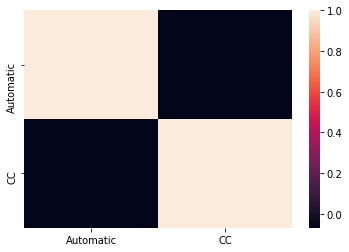

In [40]:
sns.heatmap(corr)

In [41]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [42]:
selected_columns = data.columns[columns]
selected_columns.shape

(2,)

In [43]:
data = data[selected_columns]
print(data)

      Automatic    CC
0             0  2000
1             0  2000
2             0  2000
3             0  2000
4             0  2000
...         ...   ...
1431          0  1300
1432          0  1300
1433          0  1300
1434          0  1300
1435          0  1600

[1436 rows x 2 columns]
